# Activity: Exploring the Wright-Fisher model of genetic drift

Below explore some basic questions related to genetic drift using the Wright-Fisher model.

Examples here use two basic functions:

* `SimulateAlleleFreq(N, p0, g)`: simulates the alternate allele frequency for a single bi-allelic variant in a population size of $N$ people ($2N$ alleles) for $g$ generations, starting with freqency $p0$. Assumes a constant population size.

* `SimulateAlleleFreq_VarPopSize(Nvals, p0=0.5)`: simulates alternate allele frequency, based on a variable population size according to `Nvals`. For example `[(1000, 5), (2000, 10)]` will simulate 5 generations with population size 1000 and 10 generations with population size 2000.

which we use to generate plots illustrating the process of drift under different conditions.

Below we experiment to see how drift changes as we vary the parameters ($N$, $p0$, or $g$).

## Functions for simulating drift

In [1]:
%pylab inline
import numpy as np

def SimulateAlleleFreq(N=10000, p0=0.5, g=10):
    """
    Simulate the alternate allele frequency of a single
    bi-allelic variant over one more generations.
    All variants are assumed to be neutral
    
    Parameters
    ----------
    N : int or list of [(int, int)]:
       Use a constant population size of N
         (2N alleles are simulated each generation)
       
    p0 : float
       Frequency of the alternate allele in generation 0
       
    g : int
       Number of generations to simulate. 
       
    Returns
    -------
    freqs : list of float
       Returns the alternate allele frequency at each generation
    """
    freqs = [p0]
    current_p = p0
    for i in range(g):
        x = np.random.binomial(2*N, current_p)
        current_p = x/(2*N)
        freqs.append(current_p)
    return freqs

def SimulateAlleleFreq_VarPopSize(Nvals, p0=0.5):
    """
    Simulate alternate allele frequency of a single
    bi-allelic variant under variable population size
    
    Parameters
    ----------
    Nvals : list of [(int, int)]
       For each tuple the first value gives the population size
       and the second value gives the number of generations.
       For example [(1000, 5), (2000, 10)] will simulate
       5 generations with population size 1000 and 10 generations
       with population size 2000
    p0 : float
       Frequency of the alternate allele in generation 0

    Returns
    -------
    freqs : list of float
       Returns the alternate allele frequency at each generation
    """
    freqs = []
    current_freq = p0
    for i in range(len(Nvals)):
        N, g = Nvals[i]
        f = SimulateAlleleFreq(N=N, p0=current_freq, g=g)
        if i != len(Nvals)-1:
            freqs.extend(f[0:-1])
            current_freq = f[-1]
        else:
            freqs.extend(f)
    return freqs



Populating the interactive namespace from numpy and matplotlib


## Example simulations

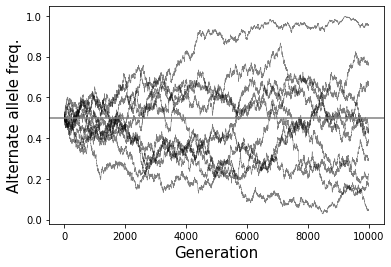

In [2]:
# Example 1 - Perform 10 simulations
# and plot allele frequency over time
numsim = 10
numgen = 10000
p0 = 0.5
popsize = 10000
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(numsim):
    freqs = SimulateAlleleFreq(N=popsize, p0=p0, g=numgen)
    ax.plot(range(numgen+1), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);

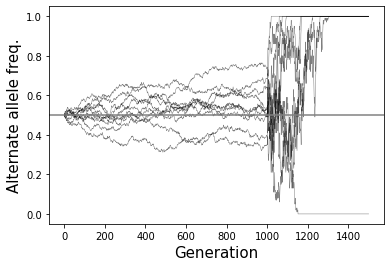

In [3]:
# Example 2 - Population bottleneck
numsim = 10
Nvals = [(10000, 1000), (50, 500)]
p0 = 0.5
popsize = 10000
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(numsim):
    freqs = SimulateAlleleFreq_VarPopSize(Nvals, p0=p0)
    ax.plot(range(len(freqs)), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);

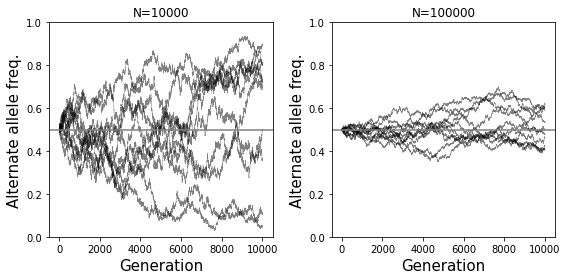

In [4]:
# Example 3 - Side by side of big vs. small population

numsim = 10
numgen = 10000
p0 = 0.5
fig = plt.figure()
fig.set_size_inches((8, 4))
popsize = 10000
ax = fig.add_subplot(121)
for i in range(numsim):
    freqs = SimulateAlleleFreq(N=popsize, p0=p0, g=numgen)
    ax.plot(range(numgen+1), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_title("N=%s"%popsize)
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);
ax.set_ylim(bottom=0, top=1)

popsize = 100000
ax = fig.add_subplot(122)
for i in range(numsim):
    freqs = SimulateAlleleFreq(N=popsize, p0=p0, g=numgen)
    ax.plot(range(numgen+1), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_title("N=%s"%popsize)
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);
ax.set_ylim(bottom=0, top=1)
fig.tight_layout()

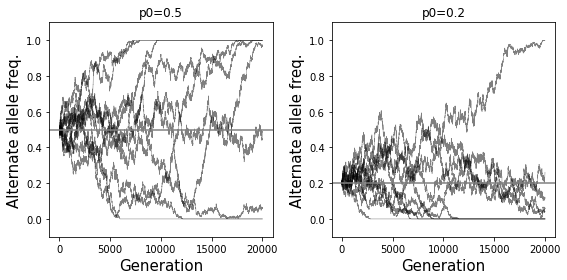

In [5]:
# Example 4 - Side by side of allele freq effect

numsim = 10
numgen = 20000
popsize = 10000

fig = plt.figure()
fig.set_size_inches((8, 4))
p0 = 0.5
ax = fig.add_subplot(121)
for i in range(numsim):
    freqs = SimulateAlleleFreq(N=popsize, p0=p0, g=numgen)
    ax.plot(range(numgen+1), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_title("p0=%s"%p0)
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);
ax.set_ylim(bottom=-0.1, top=1.1)

p0 = 0.2
ax = fig.add_subplot(122)
for i in range(numsim):
    freqs = SimulateAlleleFreq(N=popsize, p0=p0, g=numgen)
    ax.plot(range(numgen+1), freqs, color="black", linewidth=0.5, alpha=0.5)
ax.axhline(y=p0, color="gray")
ax.set_title("p0=%s"%p0)
ax.set_xlabel("Generation", size=15)
ax.set_ylabel("Alternate allele freq.", size=15);
ax.set_ylim(bottom=-0.1, top=1.1)
fig.tight_layout()

## Discussion questions

1. What eventually happens to all variants if you run the simulation for a large enough number of generations?

<font color="red">If you run for enough generations, eventually the alternate allele frequency will go to either 0 or 1 ("fixation" of either the original or the alternate allele). Once that happens, the frequency will remain constant (assuming no new mutations).</font>

2. Assuming constant population size, how does the population size ($N$) affect the time to fixation (reaching an allele frequency of 1) of a new allele (frequency 1/(2N))? You may answer qualitatively. But extra kudos if you are able to work out the exact relationship between $N$ and fixation time based on the simulations :).

<font color="red">Fixation happens faster in smaller populations. Average fixation time is $4N$. See below. </font>

3. What will be the effect of a severe population bottleneck (sudden reduction in population size)? 

<font color="red">See example plot provided. Allele frequencies will dramatically fluctuate and go toward 0 or 1 very quickly.</font>

4. How does the probability of fixation (reaching an allele frequency 1) depend on the initial allele frequency?

<font color="red">Probability of fixation is equal to the initial allele frequency. See below.</font>

5. How does the time to fixation depend on the initial allele frequency?

<font color="red">Overall, fixation happens faster for more common alleles. The relationship is a bit more complicated though. $T_{fix} = -4*N*\frac{(1-p_0)\ln(1-p_0)}{p_0}$. See below.</font>



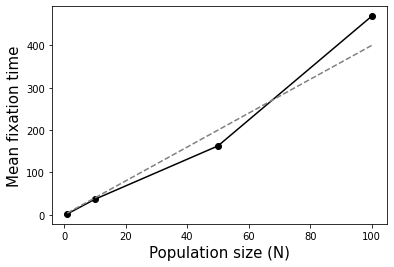

In [6]:
# Question 2 - time to fixation of a new allele
# as a function of population size

def GetFixationTime(N=10000, p0=0.5, maxg=10):
    """
    Parameters
    ----------
    N : int or list of [(int, int)]:
       Use a constant population size of N
         (2N alleles are simulated each generation)
       
    p0 : float
       Frequency of the alternate allele in generation 0
       
    maxg : int
       Maximum number of generations to simulate. 
       
    Returns
    -------
    t : int
      Generation number at which fixation (freq=1) is reached
      If fixation is not reached, return None
    """
    current_p = p0
    for t in range(maxg):
        if current_p == 1:
            return t
        if current_p == 0:
            return None
        x = np.random.binomial(2*N, current_p)
        current_p = x/(2*N)
    return None

numsim = 1000
maxg = 100000
mean_fixation_times = []
Ns = [1, 10, 50, 100]

for N in Ns:
    fts = [GetFixationTime(N=N, p0=1/(2*N), maxg=maxg) for i \
         in range(numsim)]
    fts = [item for item in fts if item is not None]
    mean_fixation_times.append(np.mean(fts))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ns, mean_fixation_times, marker="o", color="black");
ax.plot(Ns, [4*item for item in Ns], linestyle="dashed", color="gray")
ax.set_xlabel("Population size (N)", size=15)
ax.set_ylabel("Mean fixation time", size=15);

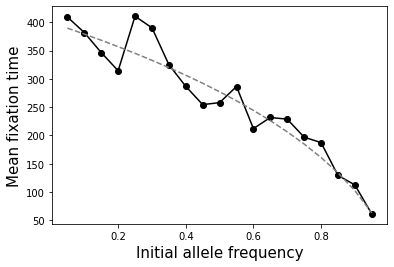

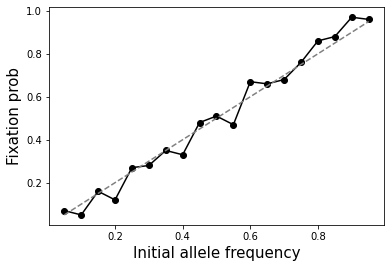

In [10]:
# Questions 4 and 5 - time to / prob. of fixation of a new allele
# as a function of allele freq

numsim = 100
maxg = 100000
mean_fixation_times = []
fixation_probs = []
N = 100
ps = np.arange(0.05, 1, 0.05)

for p0 in ps:
    fts = [GetFixationTime(N=N, p0=p0, maxg=maxg) for i \
         in range(numsim)]
    fts = [item for item in fts if item is not None]
    if len(fts) > 0:
        mean_fixation_times.append(np.mean(fts))
    else: mean_fixation_times.append(np.nan)
    fixation_probs.append(len(fts)/numsim)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ps, mean_fixation_times, marker="o", color="black");
ax.plot(ps, [-4*N*(1-item)*np.log(1-item)/item for item in ps], linestyle="dashed", color="gray")
ax.set_xlabel("Initial allele frequency", size=15)
ax.set_ylabel("Mean fixation time", size=15);

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ps, fixation_probs, marker="o", color="black");
ax.plot(ps, ps, linestyle="dashed", color="gray")
ax.set_xlabel("Initial allele frequency", size=15)
ax.set_ylabel("Fixation prob", size=15);